Here we'll take a look at the method of lines. When we discretize the spatial derivatives in a partial differential equation the result is a family of ODEs. As an example lets look at what happens with the heat equation: u_t = K*u_xx

After applying a finite difference method for the spatial derivative we have:

            u_t = (K/dt^2)*(u^i-1 -2*u^i + u^i+1)

We can solve the systems of ODE's using standard techniques like Runga-Kutta methods. The code below uses RK4 to solve the heat equation with homogeneos dirichlet boundary conditions.

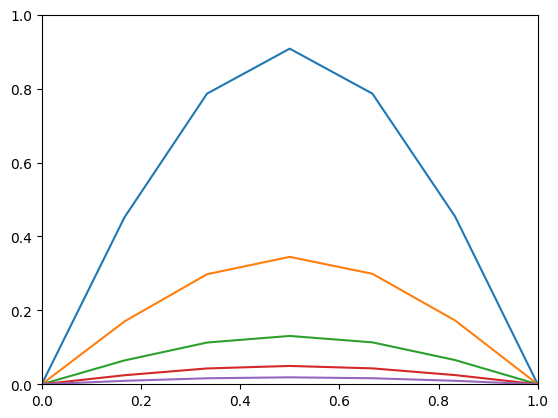

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# parameters youll set
n = 5
k = 1.0
dt = 0.01

# initial data
u0 = [np.sin(np.pi*x/(n + 1.0)) for x in range(1, n+1)]
a = 0.0
b = 1.0
ua = 0.0
ub = 0.0
dx = (b-a)/(n+1)
x = [a] + [a + m*dx for m in range(1, n+1)] + [b]
m = [min([ua, ub]+u0), max([ua, ub]+u0)]

u = u0
k1 = np.zeros(n).tolist()
k2 = np.zeros(n).tolist()
k3 = np.zeros(n).tolist()
k4 = np.zeros(n).tolist()

for i in range(50):

    k1[0] = dt*k*(ua - 2.0*u[0] + u[1])/(dx*dx)
    k1[-1] = dt*k*(u[-2] - 2.0*u[-1] + ub)/(dx*dx)
    for j in range(1, n-1):
        k1[j] = dt*k*(u[j-1] - 2.0*u[j] + u[j+1])/(dx*dx)

    k2[0] = dt*k*(ua - 2.0*(u[0] + 0.5*k1[0]) + u[1] + 0.5*k1[1])/(dx*dx)
    k2[-1] = dt*k*(u[-2] + 0.5*k1[-2] - 2.0*(u[-1] + 0.5*k1[-1]) + ub)/(dx*dx)
    for j in range(1, n-1):
        k2[j] = dt*k*(u[j-1] + 0.5*k1[j-1] - 2.0*(u[j] + 0.5*k1[j]) + u[j+1] + 0.5*k1[j+1])/(dx*dx)

    k3[0] = dt*k*(ua - 2.0*(u[0] + 0.5*k2[0]) + u[1] + 0.5*k2[1])/(dx*dx)
    k3[-1] = dt*k*(u[-2] + 0.5*k2[-2] - 2.0*(u[-1] + 0.5*k2[-1]) + ub)/(dx*dx)
    for j in range(1, n-1):
        k3[j] = dt*k*(u[j-1] + 0.5*k2[j-1] - 2.0*(u[j] + 0.5*k2[j]) + u[j+1] + 0.5*k2[j+1])/(dx*dx)

    k4[0] = dt*k*(ua - 2.0*(u[0] + 0.5*k3[0]) + u[1] + k3[1])/(dx*dx)
    k4[-1] = dt*k*(u[-2] + k3[-2] - 2.0*(u[-1] + k3[-1]) + ub)/(dx*dx)
    for j in range(1, n-1):
        k4[j] = dt*k*(u[j-1] + k3[j-1] - 2.0*(u[j] + k3[j]) + u[j+1] + k3[j+1])/(dx*dx)

    for j in range(n):
        u[j] += (k1[j] + 2.0*k2[j] + 2.0*k3[j] + k4[j])/6.0


    if i%10 == 0:
        plt.xlim(a, b)
        plt.ylim(m[0], m[1])
        plt.plot(x, [0] + u + [0])

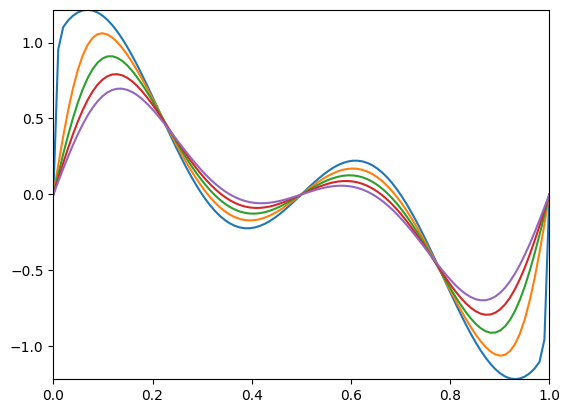

In [15]:
# parameters youll set
n = 100
k = 1.0
dt = 0.00001

# initial data
u0 = [np.sin(np.pi*2.0*x/(n + 1.0)) + np.cos(np.pi*3.0*x/(n + 1.0)) for x in range(1, n+1)]

a = 0.0
b = 1.0
ua = 0.0
ub = 0.0
u = u0
dx = (b-a)/(n+1)
x = [a] + [a + m*dx for m in range(1, n+1)] + [b]
m = [min([ua, ub]+u0), max([ua, ub]+u0)]

delta = dx*dx/(k*dt)
p1 = [0.25, 0.0, -(0.5 + delta), 0.0, 0.25, 0.0]
p2 = [0.5, 0.25, 1.0, -(0.5 + delta), 0.5, 0.25]
A = []

A.append(p1[2:] + np.zeros(2*n - 4).tolist())
A.append(p2[2:] + np.zeros(2*n - 4).tolist())
for i in range(n-2):
    A.append(np.zeros(2*i).tolist() + p1 + np.zeros(2*(n-i) - 6).tolist())
    A.append(np.zeros(2*i).tolist() + p2 + np.zeros(2*(n-i) - 6).tolist())
A.append(np.zeros(2*n - 4).tolist() + p1[:4])
A.append(np.zeros(2*n - 4).tolist() + p2[:4])

M = np.linalg.inv(np.array(A))

v = np.zeros(2*n)
for i in range(500):

    v[0] = -( -2.0*u[0] + u[1])/dt
    v[1] = -( -2.0*u[0] + u[1])/dt
    for j in range(1, n-1):
        v[2*j] = -(u[j-1] - 2.0*u[j] + u[j+1])/dt
        v[2*j+1] = -(u[j-1] - 2.0*u[j] + u[j+1])/dt
    v[-1] = -( -2.0*u[-1] + u[-2])/dt
    v[-2] = -( -2.0*u[-1] + u[-2])/dt

    l = np.dot(M, v)

    for j in range(n):
        u[j] += dt*0.5*(l[2*j] + l[2*j+1])

    if i%100 == 0:
        plt.xlim(a, b)
        plt.ylim(m[0], m[1])
        plt.plot(x, [0] + u + [0])
